In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
labels = ['alluvial', 'black', 'clay', 'red']
img_size = 224

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        print(path)
        print(os.listdir(path))
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except:
                print(Exception)
    return np.array(data, dtype=object)



In [ ]:
print(os.getcwd())

/content


In [ ]:
train = get_data('/content/drive/MyDrive/soil_dataset_3/train')
val = get_data('/content/drive/MyDrive/soil_dataset_3/test')

/content/drive/MyDrive/soil_dataset_3/train/alluvial
['Alluvial_18.jpg', 'Alluvial_33.jpg', 'Alluvial_37.jpg', 'Alluvial_43.jpg', 'Alluvial_46.jpg', 'Alluvial_26.jpg', 'Alluvial-soil-distribution-in-India.jpg', 'Alluvial_24.jpg', 'Alluvial_34.jpg', 'Alluvial_25.jpg', 'Alluvial_1.jpg', 'Alluvial_39.jpg', 'Alluvial_2.jpg', 'Alluvial_23.jpg', 'Alluvial_22.jpg', 'Alluvial_53.jpg', 'Alluvial_7.jpg', '01060602previewen-02d.jpg', '1000_F_240425429_YL91trtDxXQl8L0OKP7zyngeSb63olAC.jpg', 'Alluvial_45.jpg', 'Alluvial-Soil..png', 'Alluvial_21.jpg', 'Alluvial_3.jpg', 'Alluvial_30.jpg', 'Alluvial_48.jpg', 'Alluvial_40.jpg', 'Alluvial_47.jpg', 'Alluvial_42.jpg', 'Alluvial_35.jpg', 'Alluvial-soil-distribution-in-India-1.jpeg', 'Alluvial_11.jpg', 'Alluvial_20.jpg', 'Alluvial_17.jpg', 'Alluvial_12.jpg', 'Alluvial_13.jpg', 'Alluvial_4.jpg', 'Alluvial_14.jpg', 'Alluvial_15.jpg', 'Alluvial_31.jpg', 'Alluvial_38.jpg', '01060602previewen-02b.jpg', 'Alluvial_16.jpg', 'Alluvial_41.jpg', 'Alluvial_36.jpg', 'Al

In [ ]:
print(len(val))

201


<Axes: xlabel='count'>

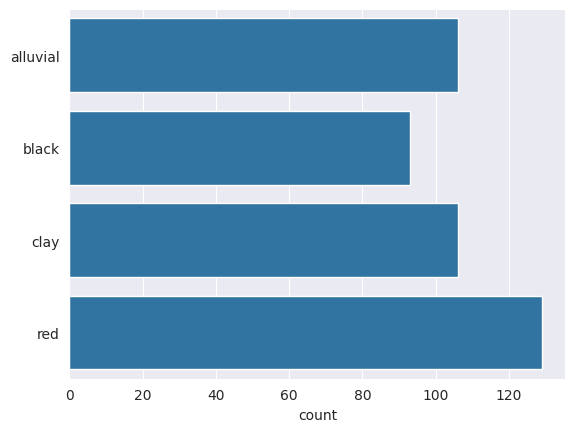

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("alluvial")
    elif (i[1] == 1):
        l.append("black")
    elif (i[1] == 2):
        l.append("clay")
    else:
        l.append("red")
sns.set_style('darkgrid')
sns.countplot(l)

In [ ]:
xtrain = []
ytrain = []
xval = []
yval = []

for feature, label in train:
    xtrain.append(feature)
    ytrain.append(label)

for feature, label in val:
    xval.append(feature)
    yval.append(label)

xtrain = np.array(xtrain) / 255
xval = np.array(xval) / 255

xtrain.reshape(-1, img_size, img_size, 1)
ytrain = np.array(ytrain)

xval.reshape(-1, img_size, img_size, 1)
yval = np.array(yval)

ytrain = keras.utils.to_categorical(ytrain, 4)
yval = keras.utils.to_categorical(yval, 4)


In [ ]:
print(len(xval))

201


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(xtrain)

In [ ]:
# model= Sequential()
# model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(224,224,3)))
# model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model.add(MaxPool2D(2,2))
# model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# model.add(MaxPool2D(2,2))
# model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

# model.add(Flatten())

# model.add(Dense(20,activation='relu'))
# model.add(Dense(15,activation='relu'))
# model.add(Dense(4,activation = 'softmax'))

# model.compile(
#               loss='categorical_crossentropy',
#               metrics=['acc'],
#               optimizer='adam'
#              )
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(img_size,img_size,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('softmax'))

model.compile(keras.optimizers.Adam(learning_rate=1e-5), 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 786432)            0         
                                                                 
 batch_normalization (Batch  (None, 786432)            3145728   
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 4)                 3145732   
                                                                 
 batch_normalization_1 (Bat  (None, 4)                 16        
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 6291476 (24.00 MB)
Trainable params: 47186

In [ ]:
history = model.fit(xtrain,ytrain,epochs = 50, validation_data = (xval, yval))

Epoch 1/50
14/14 [==============================] - 12s 689ms/step - loss: 1.0961 - accuracy: 0.6014 - val_loss: 1.3057 - val_accuracy: 0.5473
Epoch 2/50
14/14 [==============================] - 7s 510ms/step - loss: 0.9518 - accuracy: 0.6982 - val_loss: 1.1221 - val_accuracy: 0.5920
Epoch 3/50
14/14 [==============================] - 8s 576ms/step - loss: 0.9310 - accuracy: 0.6889 - val_loss: 1.0693 - val_accuracy: 0.5871
Epoch 4/50
14/14 [==============================] - 7s 513ms/step - loss: 0.8719 - accuracy: 0.7327 - val_loss: 1.0391 - val_accuracy: 0.5920
Epoch 5/50
14/14 [==============================] - 8s 573ms/step - loss: 0.8365 - accuracy: 0.7442 - val_loss: 1.0281 - val_accuracy: 0.6020
Epoch 6/50
14/14 [==============================] - 7s 518ms/step - loss: 0.7685 - accuracy: 0.7696 - val_loss: 1.0510 - val_accuracy: 0.5920
Epoch 7/50
14/14 [==============================] - 9s 674ms/step - loss: 0.7328 - accuracy: 0.7857 - val_loss: 1.0172 - val_accuracy: 0.6866
Epoch

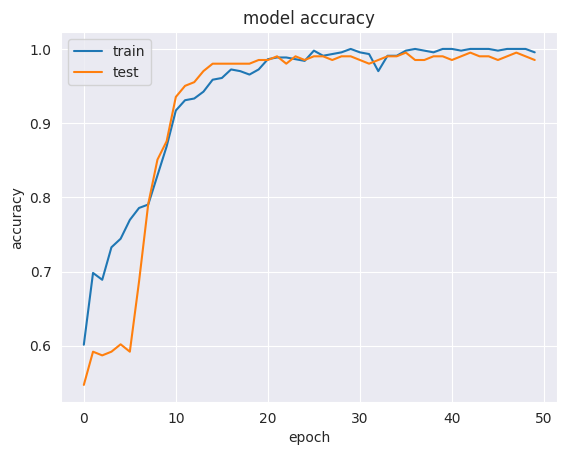

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

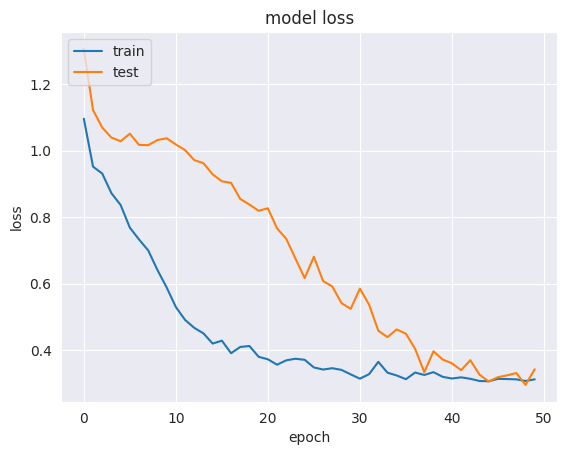

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating model on validation data
evaluate = model.evaluate(xval,yval)
print(evaluate)

7/7 [==============================] - 1s 106ms/step - loss: 0.3428 - accuracy: 0.9851
[0.34280532598495483, 0.9850746393203735]


In [ ]:
checkImage = xval[99:100]
checklabel = yval[99:100]

predict = model.predict(np.array(checkImage))

output = { 0:'alluvial',1:'black',2:'clay',3:'red'}

print("Actual    :- ",output[np.argmax(checklabel)])
print("Predicted :- ",output[np.argmax(predict)])

1/1 [==============================] - 0s 25ms/step
Actual    :-  clay
Predicted :-  clay


In [ ]:
i=4
model_loc='/content/drive/MyDrive/Models/'
path=os.listdir(model_loc)
for j in path:
  if(j.endswith('.h5')):
    i=i+1
model.save(model_loc+"soilClassify_"+str(i)+".h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import numpy as np

i=3
model_loc='/content/drive/MyDrive/Models/'
path=os.listdir(model_loc)
for j in path:
  if(j.endswith('.h5')):
    i=i+1

from keras.models import load_model
model = load_model(model_loc+"soilClassify_"+str(i)+".h5")
# latest model loaded

output = { 0:'alluvial',1:'black',2:'clay',3:'red'}

imgPath='/content/drive/MyDrive/Colab Notebooks/BST2.webp'
img=cv2.imread(imgPath)
# Check if the image is loaded successfully
if img is None:
  print("Image not loaded. Please check the path and try again.")
  exit()
checkImage=cv2.resize(img, (img_size, img_size));
checkImage = np.expand_dims(checkImage, axis=0)
print(checkImage.shape)
predict=model.predict(np.array(checkImage))
print("Prediction List : ",predict)
print("Predicted :- ",output[np.argmax(predict)])


(1, 512, 512, 3)
1/1 [==============================] - 0s 136ms/step
Prediction List :  [[0. 1. 0. 0.]]
Predicted :-  black


In [ ]:
import cv2
import numpy as np

i=3
model_loc='/content/drive/MyDrive/Models/'
path=os.listdir(model_loc)
for j in path:
  if(j.endswith('.h5')):
    i=i+1

from keras.models import load_model
model = load_model(model_loc+"soilClassify_"+str(i)+".h5")
# latest model loaded

output = { 0:'alluvial',1:'black',2:'clay',3:'red'}
labels = ['alluvial', 'black', 'clay', 'red']

for label in labels:
  for img in folder:
    imgPath=os.path.join("/content/drive/MyDrive/Colab Notebooks/"+label+"/",img)
    img=cv2.imread(imgPath)
    # Check if the image is loaded successfully
    if img is None:
      print("Image not loaded. Please check the path and try again.")
      exit()
    checkImage=cv2.resize(img, (img_size, img_size));
    checkImage = np.expand_dims(checkImage, axis=0)
    print(checkImage.shape)
    predict=model.predict(np.array(checkImage))
    print("Prediction List : ",predict)
    print("Predicted :- ",output[np.argmax(predict)])
    print("Actual    :-",label)
    print()


In [ ]:
#Best Model so far
import cv2
import numpy as np

img_size=224
model_loc="/content/drive/MyDrive/Models/"

from keras.models import load_model
model = load_model(model_loc+"soilClassify_2.h5")
# latest model loaded

output = { 0:'alluvial',1:'black',2:'clay',3:'red'}

imgPath='/content/drive/MyDrive/Colab Notebooks/BST1.webp'
img=cv2.imread(imgPath)
# Check if the image is loaded successfully
if img is None:
  print("Image not loaded. Please check the path and try again.")
  exit()
checkImage=cv2.resize(img, (img_size, img_size));
checkImage = np.expand_dims(checkImage, axis=0)
print(checkImage.shape)
predict=model.predict(np.array(checkImage))
print("Prediction List : ",predict)
print("Predicted :- ",output[np.argmax(predict)])


(1, 224, 224, 3)
1/1 [==============================] - 0s 74ms/step
Prediction List :  [[9.9999952e-01 0.0000000e+00 4.3157556e-07 0.0000000e+00]]
Predicted :-  alluvial
